In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('transfusion.csv')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
#To check how many people in total havd donated blood in march 200
item_counts = df["whether he/she donated blood in March 2007"].value_counts()
item_counts

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [4]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
#to check for any missing or null data
df.isnull()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


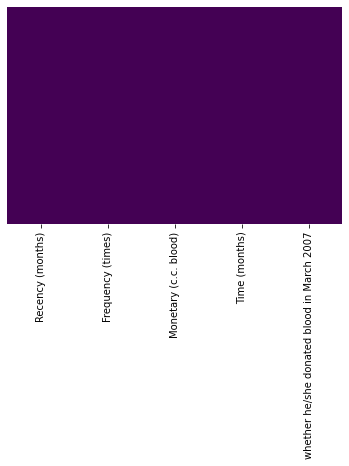

In [7]:
#to plot grapgh to check for any missing or null data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#Independent and Dependednt features-
X=df.iloc[:,0:4]
y=df.iloc[:,4]

In [9]:
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: whether he/she donated blood in March 2007, dtype: int64

In [11]:
# Lets train test split the data-
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, stratify=y)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((561, 4), (187, 4), (561,), (187,))

# Lets import the TPOT classifier-

In [13]:
!pip install tpot
from tpot import TPOTClassifier

C:\Users\HP\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [14]:
# lets fit the TPOT classifier and get the score for best algorithm-
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.7771965865992414

Generation 2 - Current best internal CV score: 0.7825221238938053

Generation 3 - Current best internal CV score: 0.7967920353982301

Generation 4 - Current best internal CV score: 0.7967920353982301

Generation 5 - Current best internal CV score: 0.7967920353982301

Generation 6 - Current best internal CV score: 0.7967920353982301

Generation 7 - Current best internal CV score: 0.7967920353982301

10.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.01, fit_prior=False), bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=12, min_samples_split=8, n_estimators=100)
0.7914438502673797


In [15]:
#to check which algorithm fits best in above problem-
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=MultinomialNB(alpha=0.01,
                                                           fit_prior=False))),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        max_features=0.9500000000000001,
                                        min_samples_leaf=12,
                                        min_samples_split=8))])

In [23]:
print(tpot.score(X_test, y_test))

0.7914438502673797


In [24]:
# Lets Scale down values of 'Monetory' using Normalization-
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaling=MinMaxScaler()

In [32]:
monetory_scaled=scaling.fit_transform(df[['Monetary (c.c. blood)']])
monetory_scaled

array([[1.        ],
       [0.24489796],
       [0.30612245],
       [0.3877551 ],
       [0.46938776],
       [0.06122449],
       [0.12244898],
       [0.2244898 ],
       [0.16326531],
       [0.91836735],
       [0.44897959],
       [0.04081633],
       [0.18367347],
       [0.24489796],
       [0.10204082],
       [0.08163265],
       [0.26530612],
       [0.28571429],
       [0.10204082],
       [0.04081633],
       [0.04081633],
       [0.20408163],
       [0.10204082],
       [0.10204082],
       [0.16326531],
       [0.26530612],
       [0.10204082],
       [0.2244898 ],
       [0.08163265],
       [0.14285714],
       [0.26530612],
       [0.18367347],
       [0.18367347],
       [0.16326531],
       [0.30612245],
       [0.14285714],
       [0.2244898 ],
       [0.10204082],
       [0.26530612],
       [0.12244898],
       [0.24489796],
       [0.08163265],
       [0.08163265],
       [0.08163265],
       [0.3877551 ],
       [0.16326531],
       [0.16326531],
       [0.020

In [33]:
df['Monetory_scaled']=monetory_scaled

In [42]:
df_final=df.drop(['Monetary (c.c. blood)'], axis=1)

In [52]:
# This is our final Dataset-
df = df[['Recency (months)', 'Frequency (times)', 'Time (months)', 'Monetory_scaled', 'whether he/she donated blood in March 2007']]
df

,Recency (months),Frequency (times),Time (months),Monetory_scaled,whether he/she donated blood in March 2007
0,2,50,98,1.000000,1
1,0,13,28,0.244898,1
2,1,16,35,0.306122,1
3,2,20,45,0.387755,1
4,1,24,77,0.469388,0
...,...,...,...,...,...
743,23,2,38,0.020408,0
744,21,2,52,0.020408,0
745,23,3,62,0.040816,0
746,39,1,39,0.000000,0


In [54]:
#Independent and Dependednt features-
X_final=df.iloc[:,0:4]
y_final=df.iloc[:,4]

In [55]:
X_final

,Recency (months),Frequency (times),Time (months),Monetory_scaled
0,2,50,98,1.000000
1,0,13,28,0.244898
2,1,16,35,0.306122
3,2,20,45,0.387755
4,1,24,77,0.469388
...,...,...,...,...
743,23,2,38,0.020408
744,21,2,52,0.020408
745,23,3,62,0.040816
746,39,1,39,0.000000


In [56]:
y_final

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

# Lets Train our model with RandomForestClassifier-

In [60]:
from sklearn.model_selection import train_test_split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final,test_size=0.25)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier(criterion='entropy',max_features=0.9500000000000001,min_samples_leaf=12,min_samples_split=8)

In [63]:
rfc.fit(X_final_train,y_final_train)

RandomForestClassifier(criterion='entropy', max_features=0.9500000000000001,
                       min_samples_leaf=12, min_samples_split=8)

In [64]:
rfc.pred=rfc.predict(X_final_test)

In [68]:
#Lets calculate the Confusion matrix-
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_final_test,rfc.pred))

[[148   8]
 [ 18  13]]


In [72]:
#Lets calculate the Classification Report-
from sklearn.metrics import classification_report
print(classification_report(y_final_test,rfc.pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       156
           1       0.62      0.42      0.50        31

    accuracy                           0.86       187
   macro avg       0.76      0.68      0.71       187
weighted avg       0.85      0.86      0.85       187



In [74]:
#Lets check the Accuracy score-
from sklearn.metrics import accuracy_score
accuracy_score(y_final_test,rfc.pred)

0.8609625668449198

# Conclusion

So, in this problem , as we have seen after performing all the Tpot classifiers and then performing Random Forest Classifier, we are getiing accuracy of 86.09%.